In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from statsmodels.tsa.seasonal import seasonal_decompose

pd.set_option('display.width', 1000)

sns.set_theme(style="whitegrid")


In [29]:
processed_data_path = '../data_processed/'
file_path = os.path.join(processed_data_path, 'indicadores_mensal.csv')

df = pd.read_csv(file_path, index_col='data', parse_dates=['data'])



Visualização de indicadores estatísticos

In [30]:
estatisticas = df.describe().T

print(estatisticas)

                          count         mean         std         min          25%          50%          75%          max
selic_media_mensal         67.0     9.376387    4.565977    2.000000     4.271552    11.072581    13.459677    15.000000
pmc_vendas_varejo          67.0   101.143134    9.330226   75.020000    96.890000   100.200000   105.255000   126.600000
gtrends_magazine_luiza     67.0    18.701493    6.871141    8.000000    14.000000    18.000000    22.000000    37.000000
gtrends_casas_bahia        67.0    16.537313    7.996833    7.000000    11.000000    16.000000    20.000000    42.000000
gtrends_mercado_livre      67.0    56.223881   16.248842   35.000000    41.500000    54.000000    64.500000   100.000000
ipca_variacao_mensal       67.0     0.480746    0.430853   -0.680000     0.240000     0.440000     0.780000     1.620000
icc_confianca_consumidor   67.0   117.167910   10.249738   96.820000   108.630000   115.210000   125.500000   138.220000
desemprego_taxa            67.0 

Visualizar a correlação de todas as colunas de nosso dataframe

> (Quanto maior o valor (1.0) e escuro (vermelho) maior será a correlação positiva dos indicadores. Demostrando que quando um aumenta o outro também aumentára)
>
> (Quanto menor o valor (-1.0) e escuro (azul) maior será a correlação negativa dos indicadores. Demostrando que quando um aumenta o outro diminui)

<Axes: >

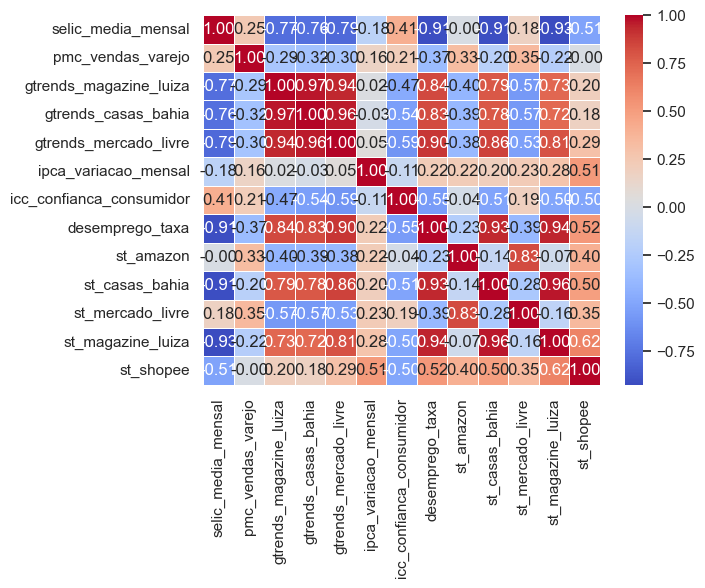

In [ ]:
corr = df.corr(method='pearson')

plt.Figure(figsize=(14,20))

sns.heatmap(
    corr,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    linewidths=.5
)

Análise para defasagem, na qual indica quanto tempo um indicador impacta ao outro, para cada coluna no dataframe

Visualizar correlação das colunas, incluindo aquelas com defasagem

Visualização com gráfico de linhas, para visualizar o impacto da selic, com as pesquisas sob a ótica das empresas analisadas

Text(0.5, -0.1, 'O gráfico demonstra uma forte correlação negativa (~ -0.76) entre a Taxa Selic e o interesse de busca.\nÀ medida que a Selic (vermelho) sobe (2021-2023), o volume de buscas pelos 3 e-ccomerces cai na mesma proporção.\nIsso demonstra que a política monetária impacto a intenção de compra do consumidor brasileiro, quase de forma imediata')

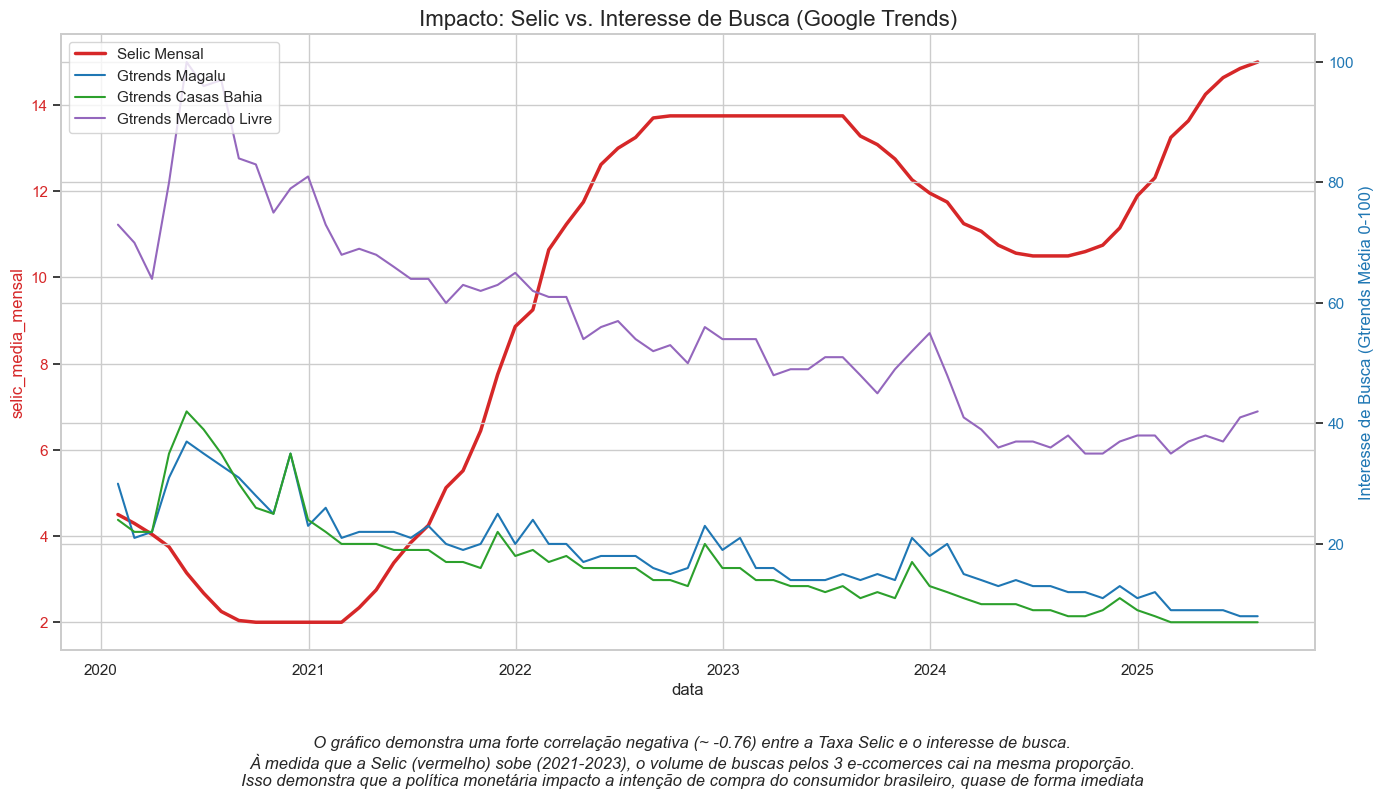

In [34]:
colunas_gtrends = ['gtrends_magazine_luiza', 'gtrends_casas_bahia', 'gtrends_mercado_livre']

plot_config = {
    'gtrends_magazine_luiza': {
        'color': 'tab:blue', 
        'label': 'Gtrends Magalu'
    },
    'gtrends_casas_bahia': {
        'color': 'tab:green', 
        'label': 'Gtrends Casas Bahia'
    },
    'gtrends_mercado_livre': {
        'color': 'tab:purple', 
        'label': 'Gtrends Mercado Livre'
    }
}

fig, ax1 = plt.subplots(figsize = (14,7))

# --- Eixo 1 : Selic (Esquerda)
cor_selic = 'tab:red'
ax1.set_xlabel('data')
ax1.set_ylabel('selic_media_mensal', color = cor_selic)

ax1.plot(
    df.index,
    df['selic_media_mensal'],
    color = cor_selic,
    label = 'Selic Mensal',
    linewidth=2.5
)
ax1.tick_params(axis='y', labelcolor=cor_selic)


# --- Eixo 2 : Gtrends (Direita)
ax2 = ax1.twinx()
cor_ax2 = 'tab:blue'
ax2.set_ylabel('Interesse de Busca (Gtrends Média 0-100)', color=cor_ax2)

for col in colunas_gtrends:
    if col in plot_config:
        config = plot_config[col]

        ax2.plot(
            df.index, 
            df[col], 
            color= config['color'], 
            label= config['label'] # Etiqueta para a legenda
        )
ax2.tick_params(axis='y', labelcolor=cor_ax2)

# --- Título e Legenda ---
fig.tight_layout() # Ajusta o layout para evitar sobreposição
plt.title('Impacto: Selic vs. Interesse de Busca (Google Trends)', fontsize=16)
    
# Adiciona a legenda (pegando labels de ambos os eixos)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

conclusão_selic_gtrends = (
    "O gráfico demonstra uma forte correlação negativa (~ -0.76) entre a Taxa Selic e o interesse de busca.\n"
    "À medida que a Selic (vermelho) sobe (2021-2023), o volume de buscas pelos 3 e-ccomerces cai na mesma proporção.\n"
    "Isso demonstra que a política monetária impacto a intenção de compra do consumidor brasileiro, quase de forma imediata"
)

fig.text(
    0.5,
    -0.1,
    conclusão_selic_gtrends,
    ha='center',
    style='italic'
)

Visualização gráfica da correlação Selic e Vendas do Varejo

Text(0.5, -0.1, 'O gráfico demonstra uma forte correlação negativa (~ -0.76) entre a Taxa Selic e o interesse de busca.\nÀ medida que a Selic (vermelho) sobe (2021-2023), o volume de buscas pelos 3 e-ccomerces cai na mesma proporção.\nIsso demonstra que a política monetária impacto a intenção de compra do consumidor brasileiro, quase de forma imediata')

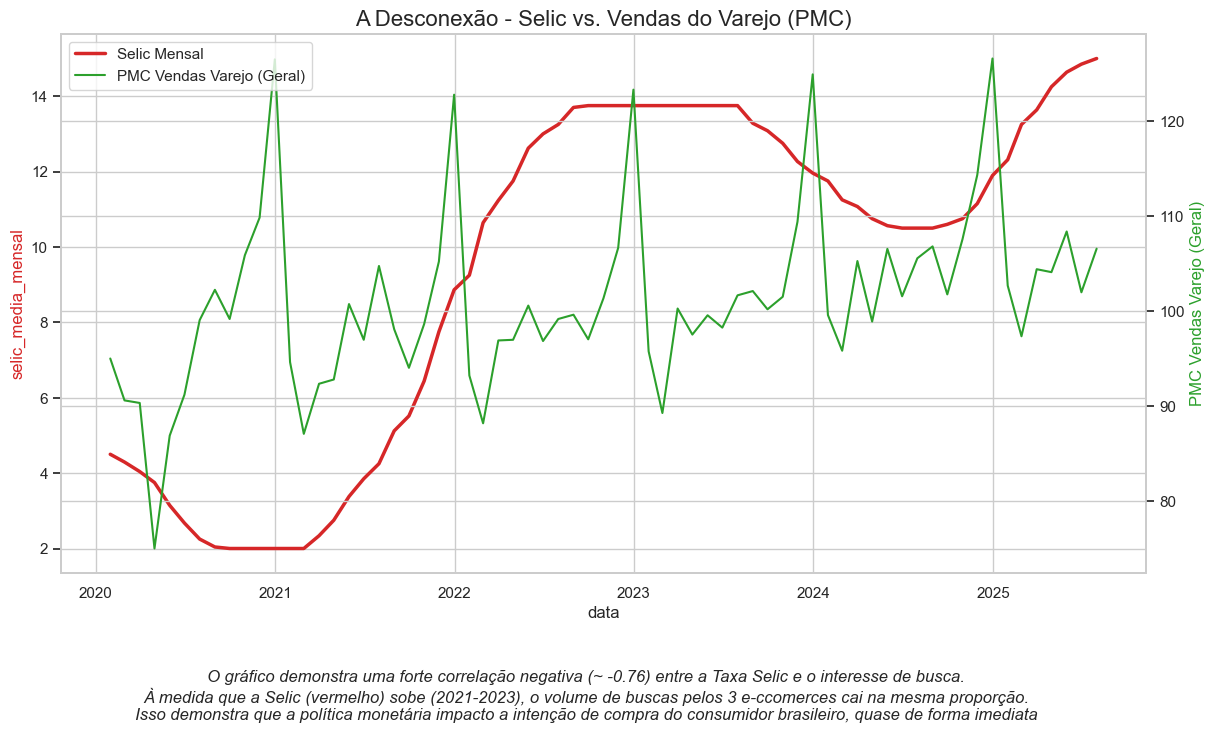

In [35]:
fig, ax1 = plt.subplots(figsize = (14,7))

# --- Eixo 1 : Selic (Esquerda)
cor_selic = 'tab:red'
ax1.set_xlabel('data')
ax1.set_ylabel('selic_media_mensal', color = cor_selic)

ax1.plot(
    df.index,
    df['selic_media_mensal'],
    color = cor_selic,
    label = 'Selic Mensal',
    linewidth=2.5
)

# --- Eixo 2 : PMC (Direita)
ax2 = ax1.twinx()
cor_ax2 = 'tab:green'
ax2.set_ylabel('PMC Vendas Varejo (Geral)', color=cor_ax2)

ax2.plot(
        df.index, 
        df['pmc_vendas_varejo'], 
        color= cor_ax2,
        label= 'PMC Vendas Varejo (Geral)'
)

plt.title('A Desconexão - Selic vs. Vendas do Varejo (PMC)', fontsize=16)
    
# Adiciona a legenda (pegando labels de ambos os eixos)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

conclusão_selic_pmc = (
    "O gráfico demonstra uma desconexão entre selic e a pesquisa mensal do comércio\n"
    "Enquanto a Selic (vermelho) sobe (2021-2023), as Vendas não mostram uma tendência de queda clara.\n"
    "Isso sugere que o índice PMC Geral, por incluir itens essenciais, não é sensível aos juros como a pesquisa / intenção de compra para as empresas."
)

fig.text(
    0.5,
    -0.1,
    conclusão_selic_gtrends,
    ha='center',
    style='italic'
)

Text(0.5, -0.1, "O gráfico mostra a correlação negativa entre Desemprego e Vendas do Varejo.\nNo pico do desemprego em 2020-2021, as vendas estavam em níveis mais baixos (excluindo picos sazonais).\nÀ medida que o desemprego cai de 2022 em diante, a 'base' das vendas parece subir gradualmente.")

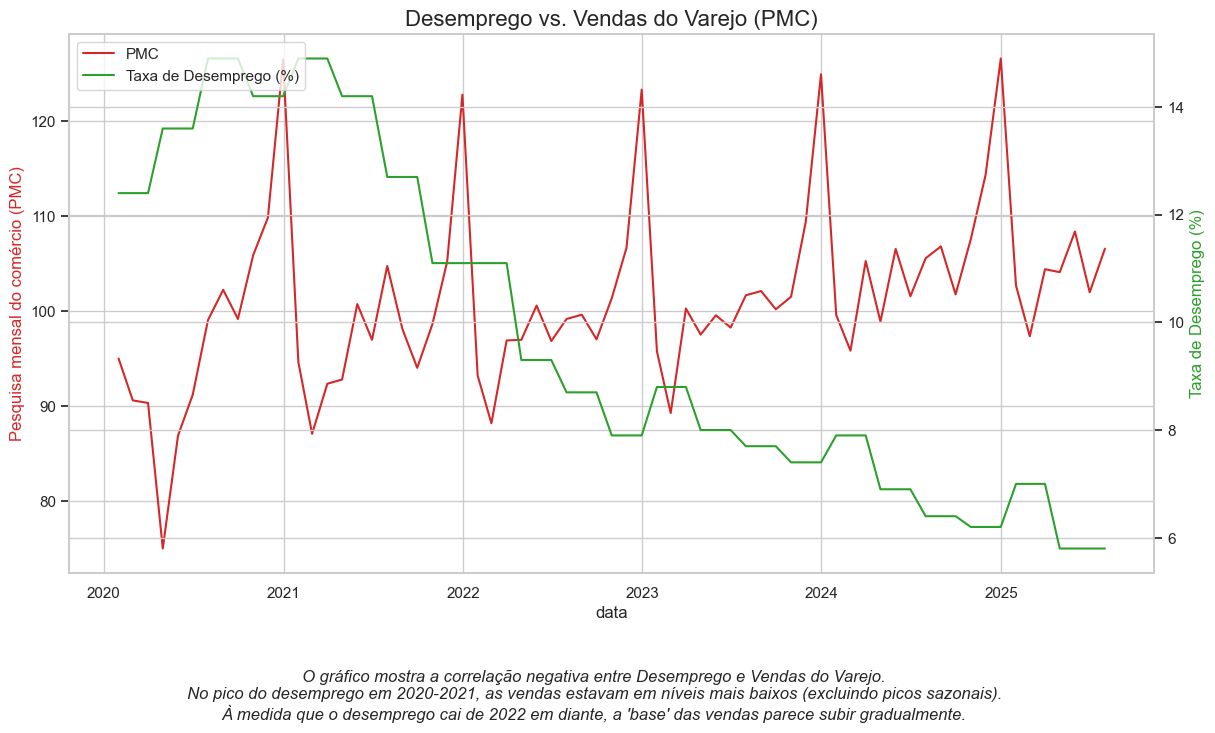

In [36]:
fig, ax1 = plt.subplots(figsize = (14,7))

# --- Eixo 1 : PMC (Esquerda)
cor_pmc = 'tab:red'
ax1.set_xlabel('data')
ax1.set_ylabel('Pesquisa mensal do comércio (PMC)', color = cor_pmc)

ax1.plot(
    df.index,
    df['pmc_vendas_varejo'],
    color = cor_pmc,
    label = 'PMC'
)

# --- Eixo 2 : Desemprego (Direita)
ax2 = ax1.twinx()
cor_ax2 = 'tab:green'
ax2.set_ylabel('Taxa de Desemprego (%)', color=cor_ax2)

ax2.plot(
        df.index, 
        df['desemprego_taxa'], 
        color= cor_ax2,
        label= 'Taxa de Desemprego (%)'
)

plt.title('Desemprego vs. Vendas do Varejo (PMC)', fontsize=16)
    
# Adiciona a legenda (pegando labels de ambos os eixos)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

conclusão_desemprego_pmc = (
    "O gráfico mostra a correlação negativa entre Desemprego e Vendas do Varejo.\n"
    "No pico do desemprego em 2020-2021, as vendas estavam em níveis mais baixos (excluindo picos sazonais).\n"
    "À medida que o desemprego cai de 2022 em diante, a 'base' das vendas parece subir gradualmente."
)

fig.text(
    0.5,
    -0.1,
    conclusão_desemprego_pmc,
    ha='center',
    style='italic'
)

Text(0.5, -0.1, "O gráfico mostra a correlação negativa entre Desemprego e Vendas do Varejo.\nNo pico do desemprego em 2020-2021, as vendas estavam em níveis mais baixos (excluindo picos sazonais).\nÀ medida que o desemprego cai de 2022 em diante, a 'base' das vendas parece subir gradualmente.")

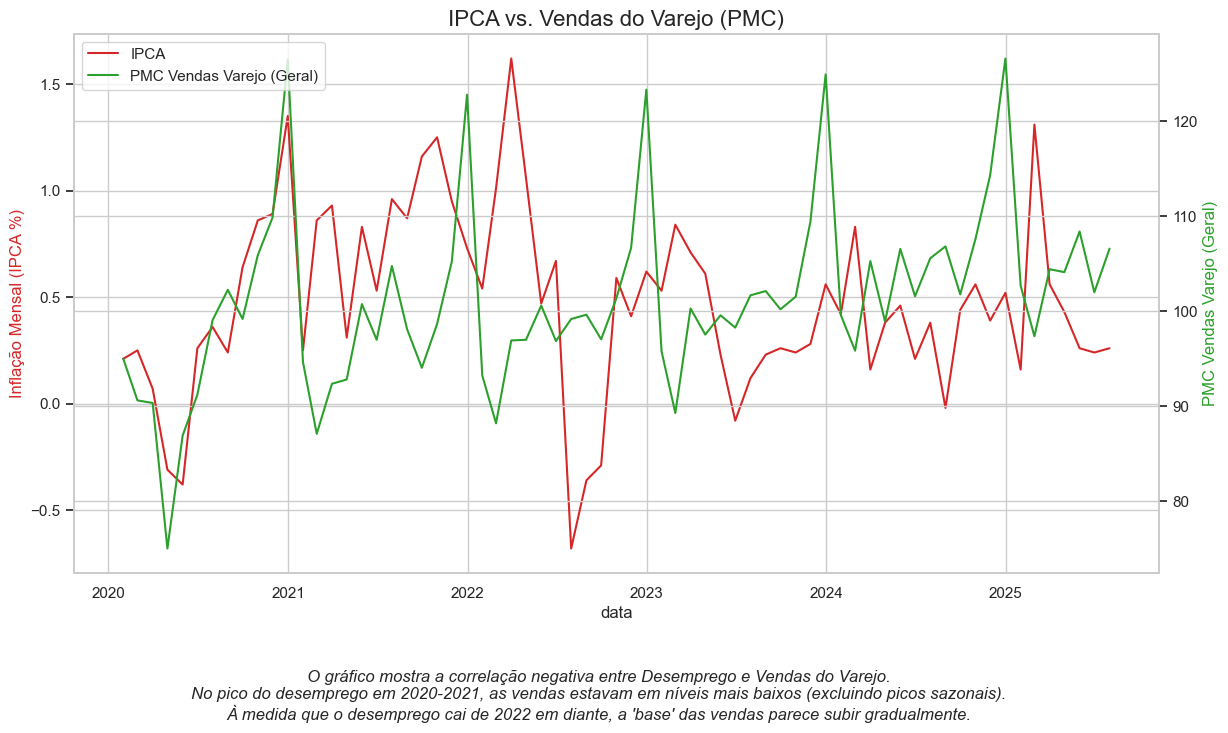

In [37]:
fig, ax1 = plt.subplots(figsize = (14,7))

# --- Eixo 1 : Selic (Esquerda)
cor_ipca = 'tab:red'
ax1.set_xlabel('data')
ax1.set_ylabel('Inflação Mensal (IPCA %)', color = cor_ipca)

ax1.plot(
    df.index,
    df['ipca_variacao_mensal'],
    color = cor_ipca,
    label = 'IPCA'
)

# --- Eixo 2 : PMC (Direita)
ax2 = ax1.twinx()
cor_ax2 = 'tab:green'
ax2.set_ylabel('PMC Vendas Varejo (Geral)', color=cor_ax2)

ax2.plot(
        df.index, 
        df['pmc_vendas_varejo'], 
        color= cor_ax2,
        label= 'PMC Vendas Varejo (Geral)'
)

plt.title('IPCA vs. Vendas do Varejo (PMC)', fontsize=16)
    
# Adiciona a legenda (pegando labels de ambos os eixos)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

conclusão_ipca_pmc = (
    "O gráfico mostra a correlação aparentemente positiva entre Desemprego e Vendas do Varejo, entretanto isso é consequência da visualização da sazonalidade.\n"
    "A sazonalidade é clara nos inícios e fim do ano, por conta de reajustes, períodos festivos...\n"
    "Entretanto o modelo de correlação que utilizamos acima, utiliza a méida da correlações, que no fim é perto ao zero."
)

fig.text(
    0.5,
    -0.1,
    conclusão_desemprego_pmc,
    ha='center',
    style='italic'
)

In [38]:
# .rolling(12) cria uma "janela" de 12 meses
# Usar o "rolling", pelo fato de fugir das sazonalidades que obtinham os dois indicadores. E no fim conseguir visualizar a tendência longa dos números.
df_12m = df.rolling(window=12).mean()

df_12m = df_12m.dropna()

Text(0.5, -0.1, "O gráfico mostra a correlação negativa entre Desemprego e Vendas do Varejo.\nNo pico do desemprego em 2020-2021, as vendas estavam em níveis mais baixos (excluindo picos sazonais).\nÀ medida que o desemprego cai de 2022 em diante, a 'base' das vendas parece subir gradualmente.")

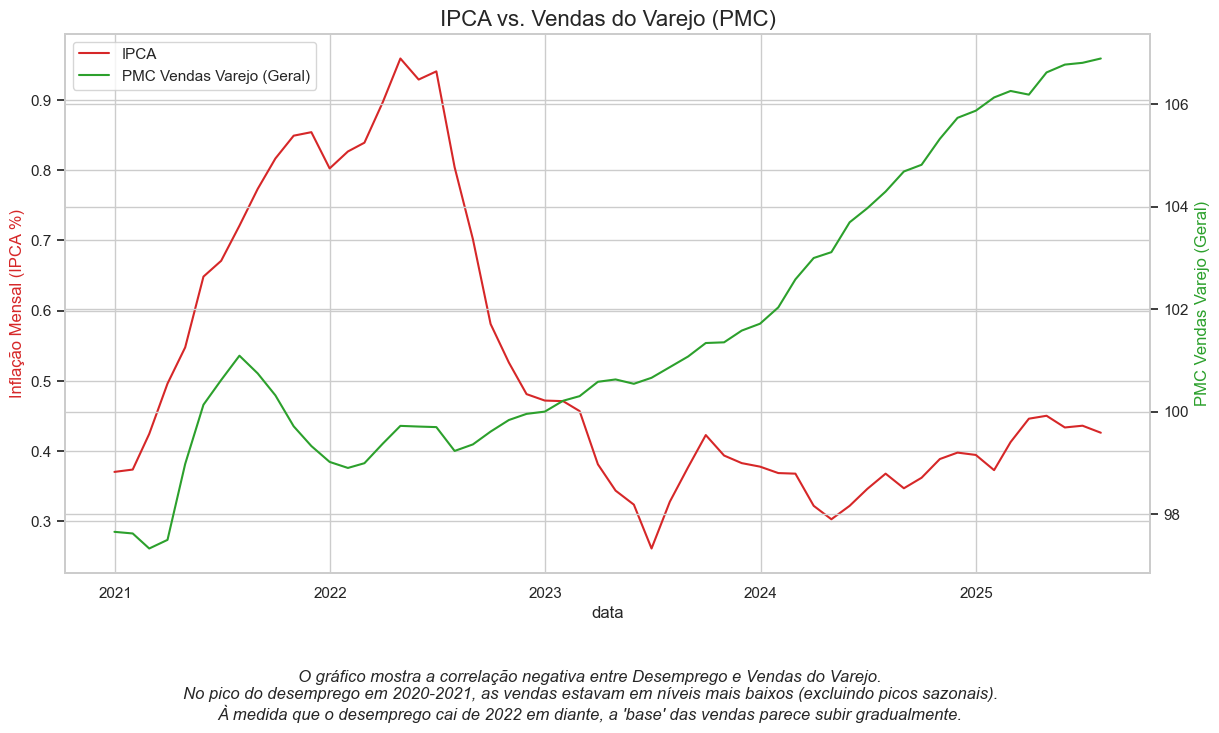

In [39]:
fig, ax1 = plt.subplots(figsize = (14,7))

# --- Eixo 1 : IPCA (Esquerda)
cor_ipca = 'tab:red'
ax1.set_xlabel('data')
ax1.set_ylabel('Inflação Mensal (IPCA %)', color = cor_ipca)

ax1.plot(
    df_12m.index,
    df_12m['ipca_variacao_mensal'],
    color = cor_ipca,
    label = 'IPCA'
)

# --- Eixo 2 : PMC (Direita)
ax2 = ax1.twinx()
cor_ax2 = 'tab:green'
ax2.set_ylabel('PMC Vendas Varejo (Geral)', color=cor_ax2)

ax2.plot(
        df_12m.index, 
        df_12m['pmc_vendas_varejo'], 
        color= cor_ax2,
        label= 'PMC Vendas Varejo (Geral)'
)

plt.title('IPCA vs. Vendas do Varejo (PMC)', fontsize=16)
    
# Adiciona a legenda (pegando labels de ambos os eixos)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

conclusão_ipca_pmc = (
    "Conclusão : Após remover a sazonalidade com uma média móvel de 12 meses, a correlação negativa mais evidente.\n"
    "No período de inflação alta (2021-2022), a tendência de vendas ficou estagnada.\n"
    "Assim que a tendência de alta da inflação caiu e se estabilizou (pós-2023), a tendência de vendas disparou."
)

fig.text(
    0.5,
    -0.1,
    conclusão_desemprego_pmc,
    ha='center',
    style='italic'
)

Text(0.5, -0.1, 'A relação entre Confiança (ICC) e Vendas (PMC) não é clara.\nAs tendências se moveram em oposição em 2021-2022 e se alinharam em 2023.\nsugerindo que fatores externos (como inflação baixa, notícias, política) podem ser influenciar o sentimento do consumidor.')

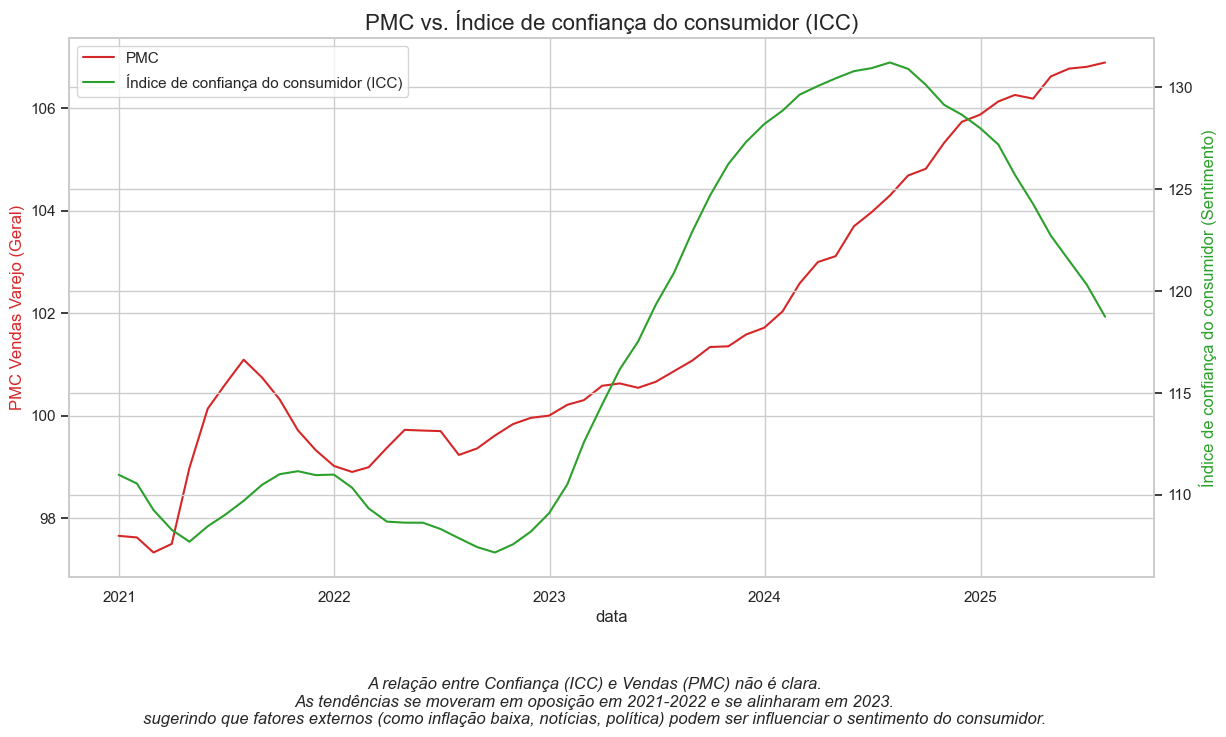

In [40]:
fig, ax1 = plt.subplots(figsize = (14,7))

# --- Eixo 1 : PMC (Esquerda)
cor_pmc = 'tab:red'
ax1.set_xlabel('data')
ax1.set_ylabel('PMC Vendas Varejo (Geral)', color = cor_pmc)

ax1.plot(
    df_12m.index,
    df_12m['pmc_vendas_varejo'],
    color = cor_pmc,
    label = 'PMC'
)

# --- Eixo 2 : ICC (Direita)
ax2 = ax1.twinx()
cor_ax2 = 'tab:green'
ax2.set_ylabel('Índice de confiança do consumidor (Sentimento)', color=cor_ax2)

ax2.plot(
        df_12m.index, 
        df_12m['icc_confianca_consumidor'], 
        color= cor_ax2,
        label= 'Índice de confiança do consumidor (ICC)'
)

plt.title('PMC vs. Índice de confiança do consumidor (ICC)', fontsize=16)
    
# Adiciona a legenda (pegando labels de ambos os eixos)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

conclusão_pmc_icc = (
    "A relação entre Confiança (ICC) e Vendas (PMC) não é clara.\n"
    "As tendências se moveram em oposição em 2021-2022 e se alinharam em 2023.\n"
    "sugerindo que fatores externos (como inflação baixa, notícias, política) podem ser influenciar o sentimento do consumidor."
)

fig.text(
    0.5,
    -0.1,
    conclusão_pmc_icc,
    ha='center',
    style='italic'
)

Análise de distribuição (Histogramas)

Text(0.5, -0.1, 'PMC (95-100) apesar da volatilidade visualizada, o padrão de vendas (o volume "normal" fora de picos) é bem estável e previsível, flutuando em torno da base 100 do índice.\nGtrends - O Mercado Livre tem um nível de interesse muito alto e consistente. Magalu e Casas Bahia competem em um patamar de busca mais baixo, com picos ocasionais.')

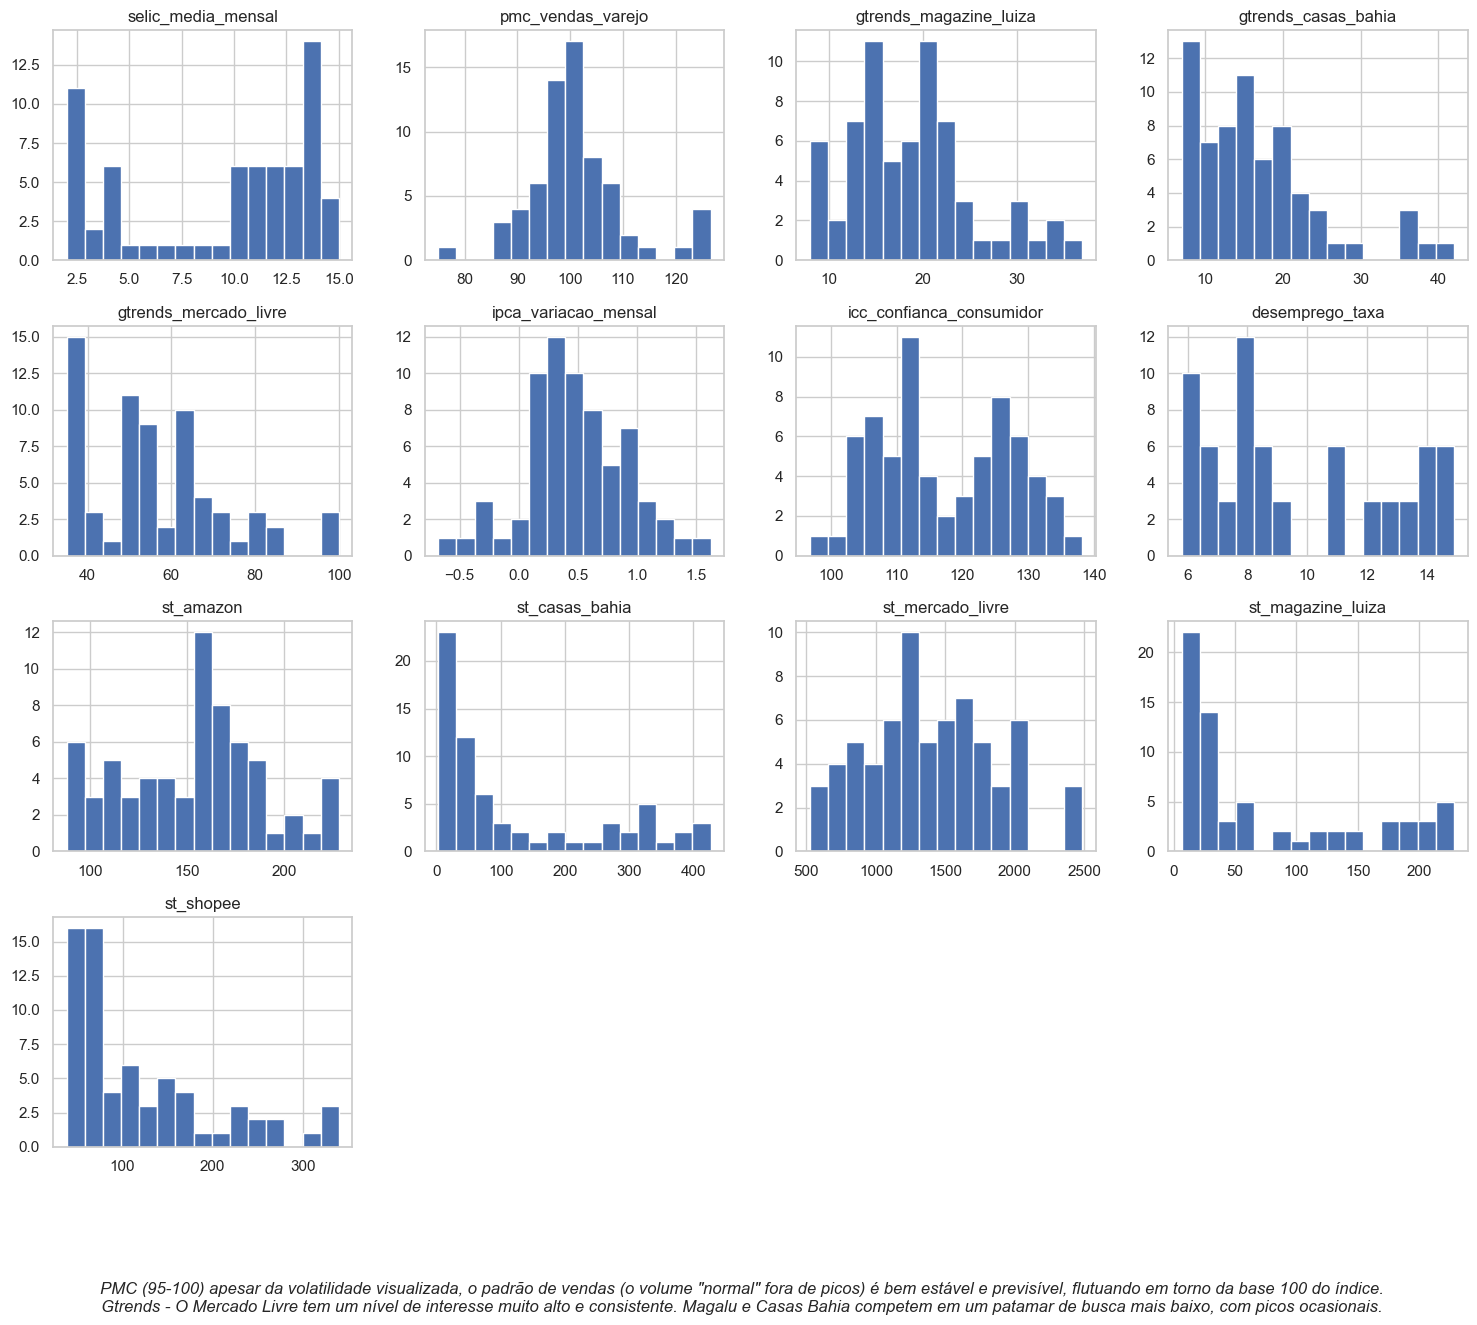

In [41]:
df.hist(bins=15, figsize=(15,12))

plt.tight_layout()

fig = plt.gcf()

conclusão_hist = (
    'PMC (95-100) apesar da volatilidade visualizada, o padrão de vendas (o volume "normal" fora de picos) é bem estável e previsível, flutuando em torno da base 100 do índice.\n'
    'Gtrends - O Mercado Livre tem um nível de interesse muito alto e consistente. Magalu e Casas Bahia competem em um patamar de busca mais baixo, com picos ocasionais.'
)

fig.text(
        0.5,
        -0.1,
        conclusão_hist,
        ha='center',
        style='italic'
)

Análise de Outliers (Boxplots)

C:\Users\Thiag\AppData\Local\Temp\ipykernel_9652\2479239669.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Indicador', y='Valor', data=df_melted, palette='pastel')


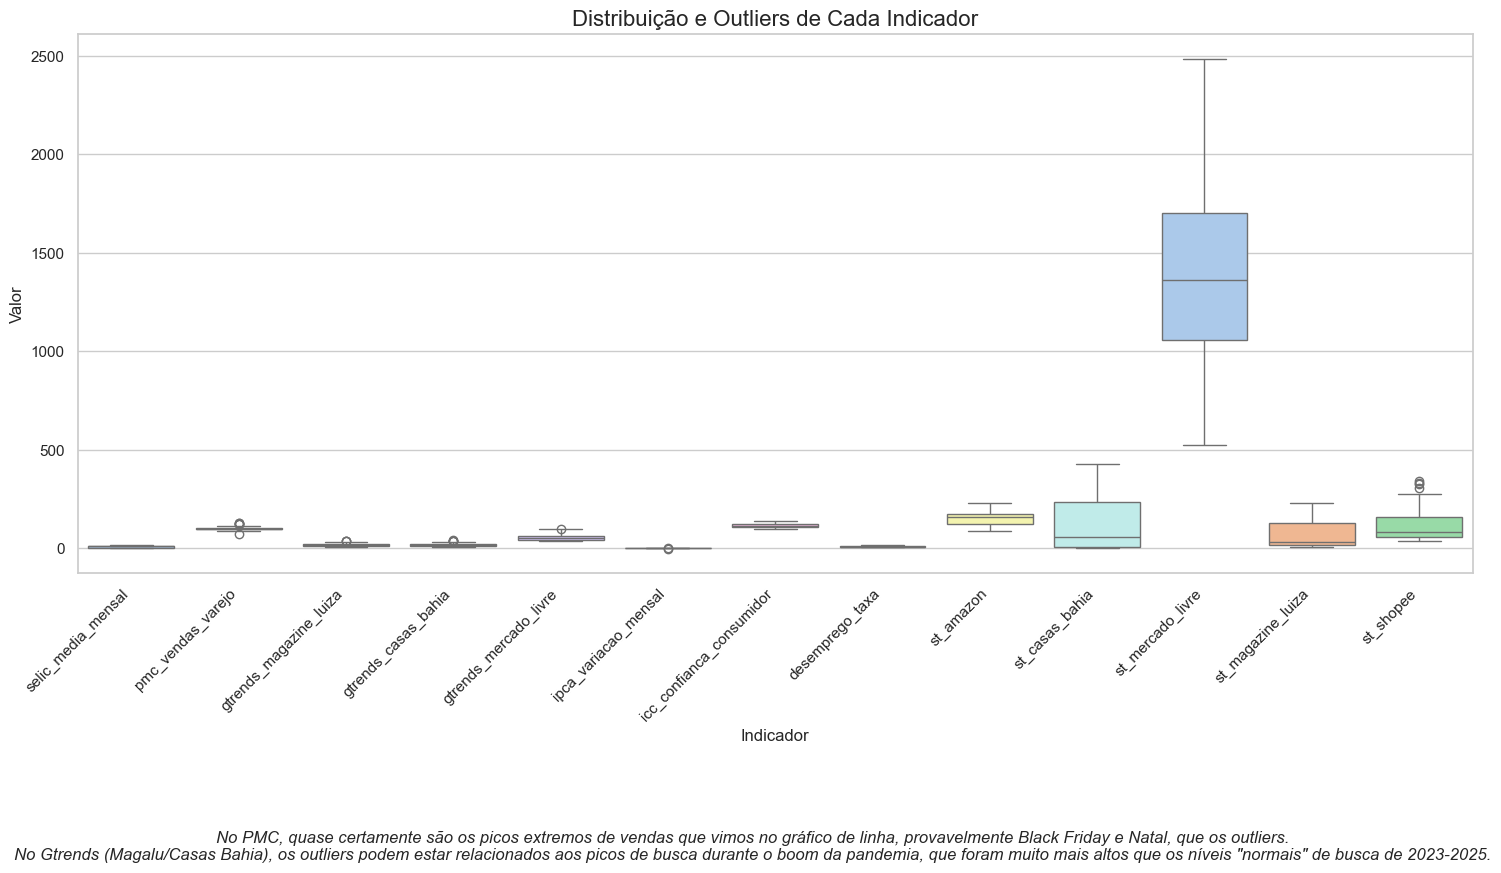

In [42]:
# O 'melt' coloca o DataFrame para o formato longo,
df_melted = df.melt(var_name='Indicador', value_name='Valor')

plt.figure(figsize=(18, 7))
sns.boxplot(x='Indicador', y='Valor', data=df_melted, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.title('Distribuição e Outliers de Cada Indicador', fontsize=16)

fig = plt.gcf()

conclusão_boxplot = (
    'No PMC, quase certamente são os picos extremos de vendas que vimos no gráfico de linha, provavelmente Black Friday e Natal, que os outliers.\n'
    'No Gtrends (Magalu/Casas Bahia), os outliers podem estar relacionados aos picos de busca durante o boom da pandemia, que foram muito mais altos que os níveis "normais" de busca de 2023-2025.'
)

fig.text(
        0.5,
        -0.3,
        conclusão_boxplot,
        ha='center',
        style='italic'
)

plt.show()

Decompondo a série temporal da PMC (Vendas do Varejo)

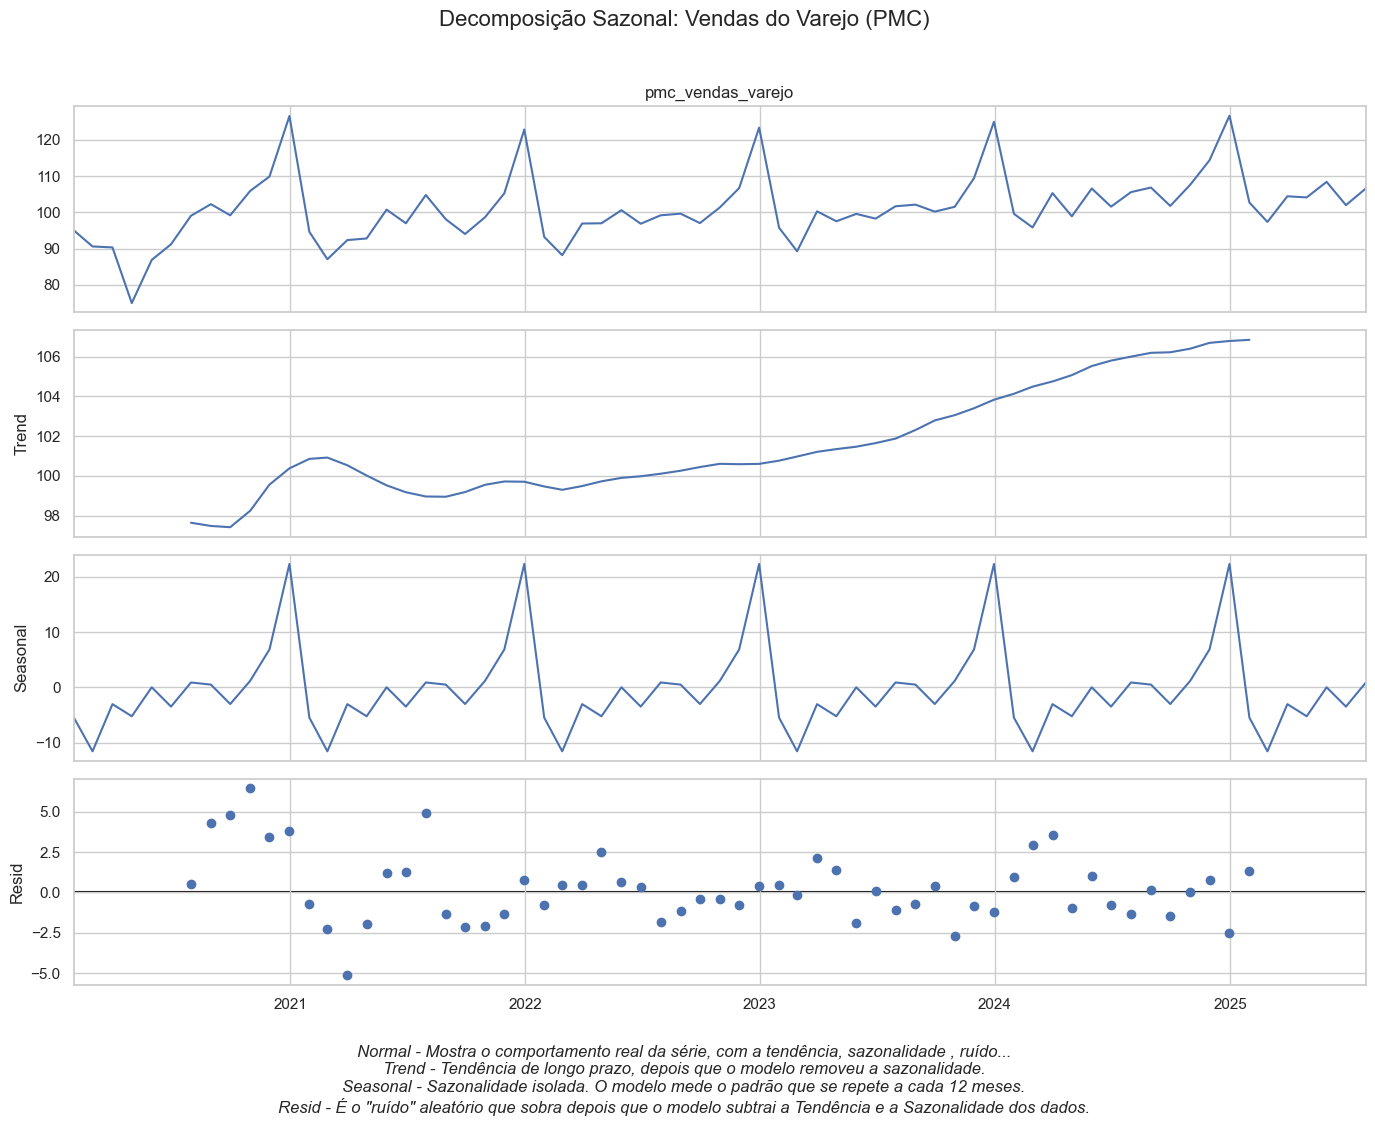

In [43]:
# 'model='additive'' -> Assume que Sazonalidade + Tendência + Resíduo = Valor Original
decomposicao_pmc = seasonal_decompose(df['pmc_vendas_varejo'], model='additive', period=12)

# Plotar os resultados da decomposição
fig = decomposicao_pmc.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Decomposição Sazonal: Vendas do Varejo (PMC)", y=1.02, fontsize=16)
plt.tight_layout()

conclusão_sazonal_pmc = (
    'Normal - Mostra o comportamento real da série, com a tendência, sazonalidade , ruído...\n'
    'Trend - Tendência de longo prazo, depois que o modelo removeu a sazonalidade.\n'
    'Seasonal - Sazonalidade isolada. O modelo mede o padrão que se repete a cada 12 meses.\n'
    'Resid - É o "ruído" aleatório que sobra depois que o modelo subtrai a Tendência e a Sazonalidade dos dados.\n'
)

fig.text(
        0.5,
        -0.1,
        conclusão_sazonal_pmc,
        ha='center',
        style='italic'
)

plt.show()

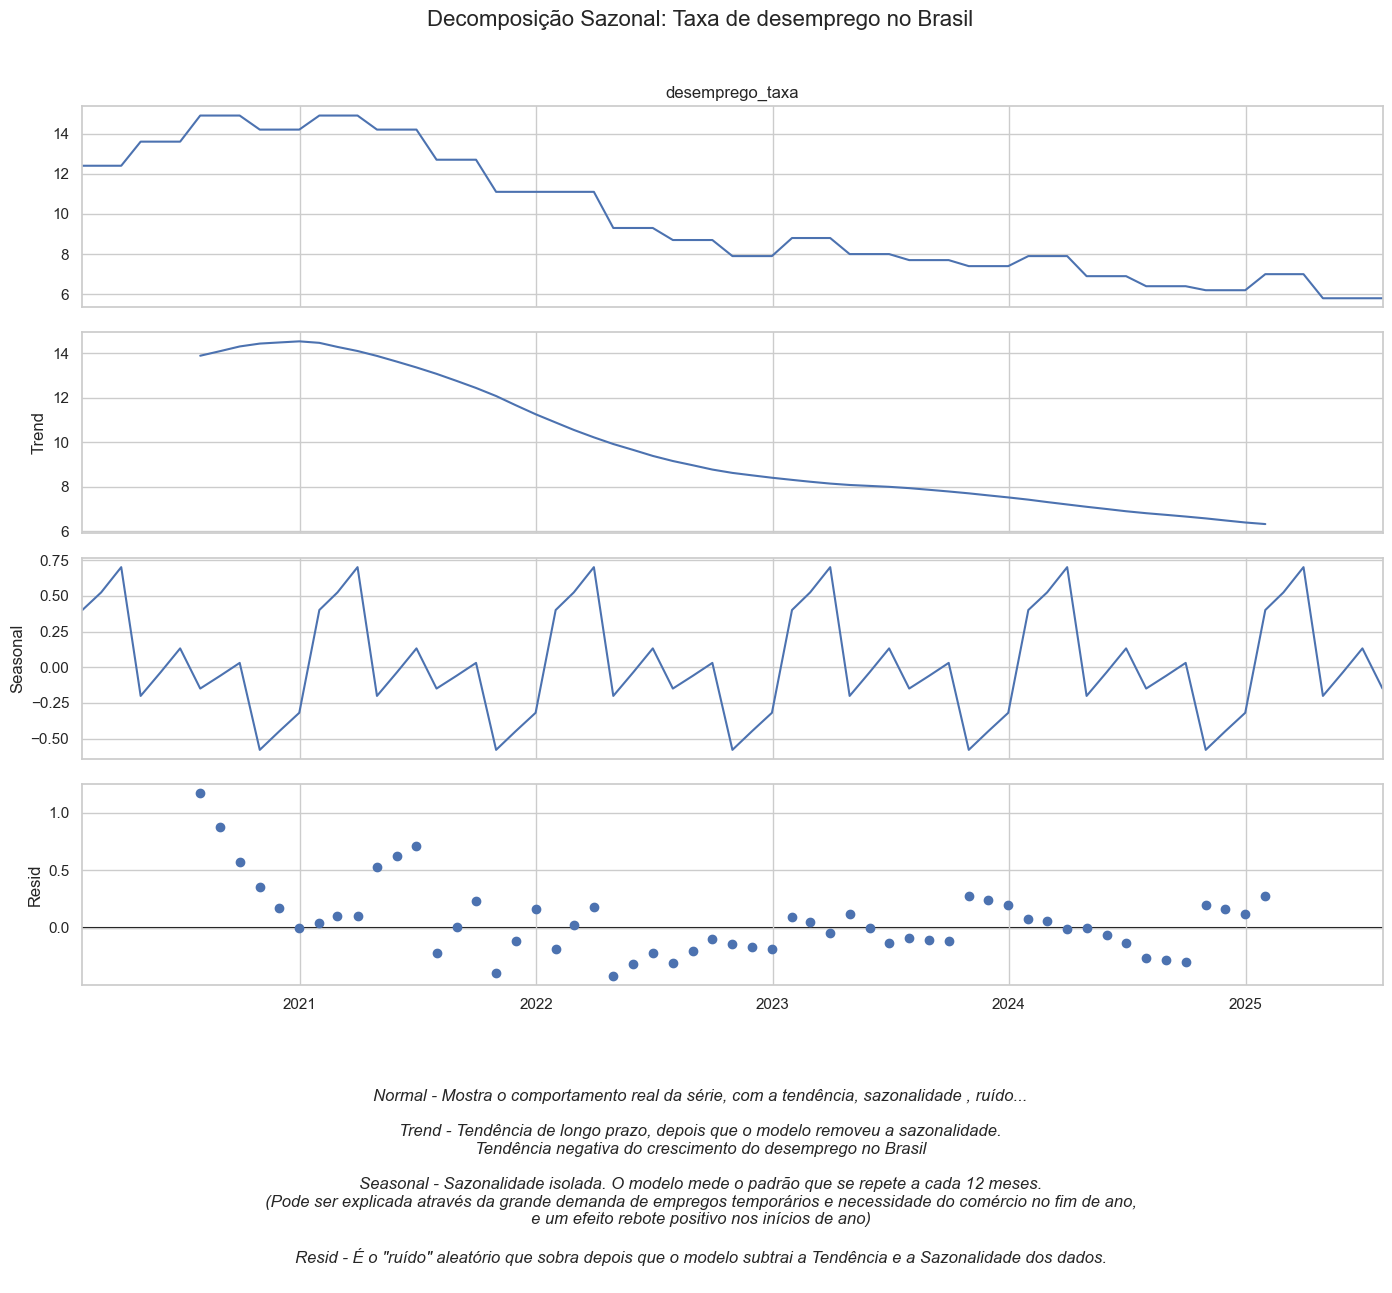

In [44]:
# 'model='additive'' -> Assume que Sazonalidade + Tendência + Resíduo = Valor Original
decomposicao_pmc = seasonal_decompose(df['desemprego_taxa'], model='additive', period=12)

# Plotar os resultados da decomposição
fig = decomposicao_pmc.plot()
fig.set_size_inches(14, 10)
plt.suptitle("Decomposição Sazonal: Taxa de desemprego no Brasil", y=1.02, fontsize=16)
plt.tight_layout()

conclusão_sazonal_pmc = (
    '\nNormal - Mostra o comportamento real da série, com a tendência, sazonalidade , ruído...\n'
    '\nTrend - Tendência de longo prazo, depois que o modelo removeu a sazonalidade.\n'
    'Tendência negativa do crescimento do desemprego no Brasil\n'
    '\nSeasonal - Sazonalidade isolada. O modelo mede o padrão que se repete a cada 12 meses.\n'
    '(Pode ser explicada através da grande demanda de empregos temporários e necessidade do comércio no fim de ano,\n'
    'e um efeito rebote positivo nos inícios de ano)\n'
    '\nResid - É o "ruído" aleatório que sobra depois que o modelo subtrai a Tendência e a Sazonalidade dos dados.\n'
)

fig.text(
        0.5,
        -0.25,
        conclusão_sazonal_pmc,
        ha='center',
        style='italic'
)

plt.show()

C:\Users\Thiag\AppData\Local\Temp\ipykernel_9652\1601983434.py:15: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='upper left', bbox_to_anchor=(1, 1))


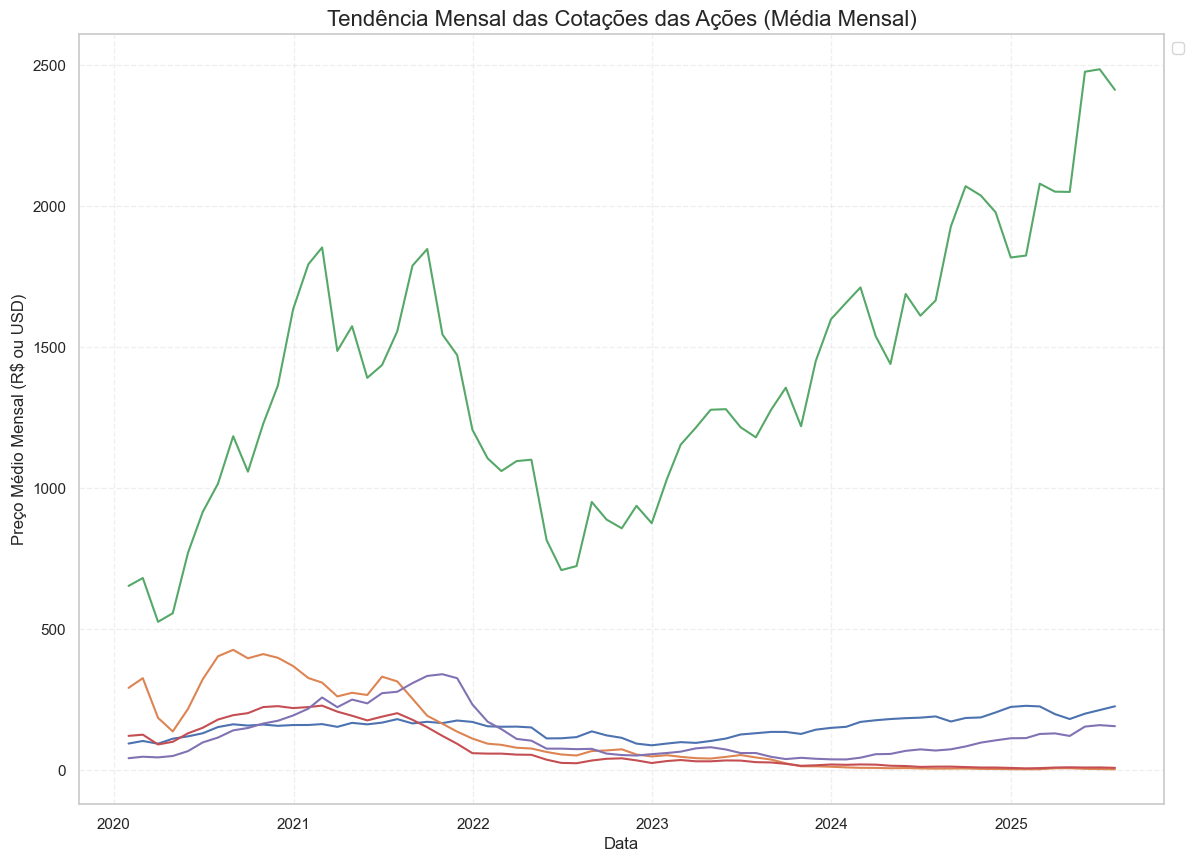

In [45]:
plt.figure(figsize=(14,10))

for coluna in df.columns:
    if coluna.startswith('st'):
        plt.plot(
            df.index,
            df[coluna]
        )

plt.title('Tendência Mensal das Cotações das Ações (Média Mensal)', fontsize=16)
plt.xlabel('Data')
plt.ylabel('Preço Médio Mensal (R$ ou USD)')
plt.grid(True, linestyle='--', alpha=0.3) # Adiciona um grid

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()